In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import matplotlib

import math

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilograms
d = UNITS.days

<Unit('day')>

In [3]:
# mass in terms of kg
init = State(r = 1.49604618e11 * m, v = 0.0 * m / s)

,values
r,149604618000.0 meter
v,0.0 meter / second


In [4]:
secPerDay = 86400 * s / d
t_end = 100 * secPerDay * d # 100 days
dt = 1800 * s # 30 min in seconds

1800 <Unit('second')>

In [5]:
system = System(init=init, mSun = 1988500e24 * kg, G = 6.67408e-11 * m**3 / kg / s**2, t_end=t_end, dt=dt)

,values
init,r 149604618000.0 meter v 0.0 meter / s...
mSun,1.9885e+30 kilogram
G,6.67408e-11 meter ** 3 / kilogram / second ** 2
t_end,8640000.0 second
dt,1800 second


In [6]:
def slope_func(state, t, system):
    """Compute derivatives of the state.

    state: position (r), velocity (v)
    t: time
    system: System object containing G, mSun, dt

    returns: derivatives of r and v
    """
    r, v = state
    G, mSun, dt = system.G, system.mSun, system.dt

    drdt = v
    dvdt = - mSun * G / r**2

    return drdt, dvdt

In [7]:
drdt, dvdt = slope_func(system.init, 0, system)
print(drdt)
print(dvdt)

0.0 meter / second
-0.0059296219366487815 meter / second ** 2


In [8]:
def plot_position(xaxis, results):
    plot(xaxis, results.r, label='r')
    decorate(xlabel='Time (days)',
             ylabel='Position (m)')

In [9]:
def event_func(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
    r, v = state
    collisionRadius = (6378100 + 695510196) * m

    return r - collisionRadius

In [10]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
success,True
message,A termination event occurred.


In [11]:
results.tail()

,r,v
5.572800e+06,2871210807.5407987 meter,-301086.30968793645 meter / second
5.574600e+06,2303175794.147881 meter,-336771.0409121819 meter / second
5.576400e+06,1656457804.8681397 meter,-397708.96442912915 meter / second
5.578200e+06,862225848.3534552 meter,-548320.3809011652 meter / second
5.578426e+06,701888296.0 meter,-1098035.1543410993 meter / second


Saving figure to file orbital_mech.pdf


Days for Earth to collide with the Sun: 65


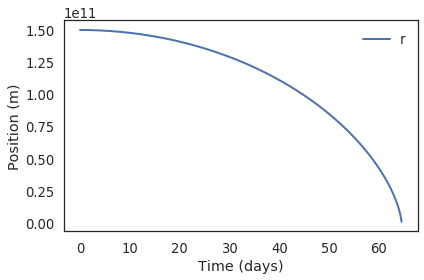

In [12]:
t_collision = get_last_label(results) / secPerDay * s / d
days = linspace(0, t_collision, len(results))
plot(days, results.r, label='r')
decorate(xlabel='Time (days)', ylabel='Position (m)')
savefig('orbital_mech.pdf')
print("Days for Earth to collide with the Sun:", int(round(t_collision)))

# 2D Orbital Model

In [13]:
m = UNITS.meter
radian = UNITS.radian
degree = UNITS.degree
s = UNITS.second
kg = UNITS.kilograms
d = UNITS.days

<Unit('day')>

In [14]:
secPerDay = 86400 * s / d
t_end = 365 * secPerDay * d * 10 # 365 days = 1 year
# dt = 1800 * s # 30 min in seconds
dt = t_end/10000

31536.0 <Unit('second')>

In [15]:
# init = State(r=Vector(1.496e11*m, 0.0*m), v=Vector(0.0*m/s, 2.977e4*m/s))
init = State(r=Vector(1.496e11*m, 0.0*m), v=Vector(0.0*m/s, 15000*m/s))
system = System(init=init, mSun=1988500e24 * kg, G=6.67408e-11 * m**3 / kg / s**2, t_end=t_end, dt=dt)

,values
init,"r [149600000000.0 meter, 0.0 met..."
mSun,1.9885e+30 kilogram
G,6.67408e-11 meter ** 3 / kilogram / second ** 2
t_end,315360000.0 second
dt,31536.0 second


In [16]:
def slope_func_2d(state, t, system):
    """Compute derivatives of the state.

    state: position (r), velocity (v)
    t: time
    system: System object containing G, mSun, dt

    returns: derivatives of r and v
    """

    r, v = state
    G, mSun = system.G, system.mSun

    drdt = v
    dvdt = -r.hat() * mSun * G / (r.mag)**2

    return drdt, dvdt

#### vector ode solver method which has a divide by zero error due to the y component of the position vector starting at 0. how to fix?

In [18]:
results, details = run_ode_solver(system, slope_func_2d)
details

,values
success,True
message,The solver successfully reached the end of the...


In [19]:
results.tail()

,r,v
315233856,"[4910791552.923948 meter, 32751319182.446575 m...","[-73877.76371720538 meter / second, -33852.581..."
315265392,"[2572060000.694435 meter, 31624238451.220062 m...","[-74334.46313331948 meter / second, -37804.160..."
315296928,"[222534316.0211692 meter, 30366708549.844597 m...","[-74526.65875414367 meter / second, -42137.365..."
315328464,"[-2128262802.1562781 meter, 28966304679.754147...","[-74370.79549286034 meter / second, -46872.357..."
315360000,"[-4467887776.78768 meter, 27410117865.366615 m...","[-73764.4414192868 meter / second, -52016.1454..."


In [20]:
results.head()

,r,v
0,"[149600000000.0 meter, 0.0 meter]","[0.0 meter / second, 15000.0 meter / second]"
31536,"[149597051256.242 meter, 473040000.0 meter]","[-187.0071674697058 meter / second, 14999.7043..."
63072,"[149588204982.42993 meter, 946061351.605876 me...","[-374.0234700012667 meter / second, 14998.8172..."
94608,"[149573460746.42435 meter, 1419045402.3417292 ...","[-561.0580448188505 meter / second, 14997.3386..."
126144,"[149552817827.87823 meter, 1891973491.322524 m...","[-748.1200338884271 meter / second, 14995.2680..."


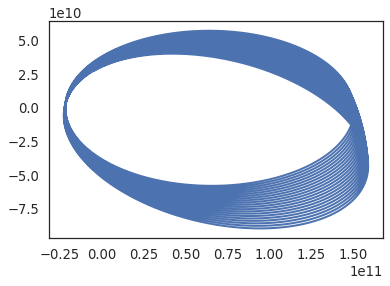

In [21]:
xs = results.r.extract('x')
ys = results.r.extract('y')

plot(xs, ys)
# plot(xs)
# plot(ys)

# decorate(xlabel='Time (s)',
#          ylabel='Position (m)')

In [22]:
print(min(xs), max(xs))
print(min(ys), max(ys))

-22689935781.014717 meter 158751392100.31793 meter
-89865132816.59145 meter 57014065376.71481 meter
